### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import pingouin
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Data loading

In [2]:
test = pd.read_csv('test_group.csv', delimiter = ';')
control = pd.read_csv('control_group.csv', delimiter = ';')

In [3]:
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [4]:
control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Unifying the dataset

In [5]:
df = pd.concat([test, control], axis = 0) #merging the two dataframes vertically as they contain the same inforation but for the two campaigns
df = df.reset_index(drop = True)

In [6]:
df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
1,Test Campaign,2.08.2019,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0
2,Test Campaign,3.08.2019,2365,70263.0,45198.0,7885.0,2572.0,2367.0,1268.0,578.0
3,Test Campaign,4.08.2019,2710,78451.0,25937.0,4216.0,2216.0,1437.0,566.0,340.0
4,Test Campaign,5.08.2019,2297,114295.0,95138.0,5863.0,2106.0,858.0,956.0,768.0


### Data Exploration

In [7]:
df.drop(['Reach', '# of Searches', '# of View Content', '# of Add to Cart'], axis=1, inplace=True) # not necessary for analysis
df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,# of Website Clicks,# of Purchase
0,Test Campaign,1.08.2019,3008,39550.0,3038.0,255.0
1,Test Campaign,2.08.2019,2542,100719.0,4657.0,677.0
2,Test Campaign,3.08.2019,2365,70263.0,7885.0,578.0
3,Test Campaign,4.08.2019,2710,78451.0,4216.0,340.0
4,Test Campaign,5.08.2019,2297,114295.0,5863.0,768.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        60 non-null     object 
 1   Date                 60 non-null     object 
 2   Spend [USD]          60 non-null     int64  
 3   # of Impressions     59 non-null     float64
 4   # of Website Clicks  59 non-null     float64
 5   # of Purchase        59 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.9+ KB


In [9]:
df['Date'] = pd.to_datetime(df["Date"], dayfirst = True).dt.date
df['Spend [USD]'] = df['Spend [USD]'].astype(float)

In [10]:
df.describe()

,Spend [USD],# of Impressions,# of Website Clicks,# of Purchase
count,60.000000,59.000000,59.000000,59.000000
mean,2425.750000,91775.881356,5682.593220,522.000000
std,381.130461,32465.070636,1754.777559,196.973917
min,1757.000000,22521.000000,2277.000000,222.000000
25%,2073.750000,68853.500000,4227.500000,340.000000
50%,2420.500000,95843.000000,5691.000000,501.000000
75%,2727.500000,117315.000000,7218.500000,693.000000
max,3112.000000,145248.000000,8264.000000,890.000000


In [11]:
df['Campaign Name'].value_counts()

Campaign Name
Test Campaign       30
Control Campaign    30
Name: count, dtype: int64

In [12]:
df.dtypes

Campaign Name           object
Date                    object
Spend [USD]            float64
# of Impressions       float64
# of Website Clicks    float64
# of Purchase          float64
dtype: object

### Data cleaning

In [13]:
df.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
# of Website Clicks    1
# of Purchase          1
dtype: int64

In [14]:
df[df.isnull().any(axis=1)]

,Campaign Name,Date,Spend [USD],# of Impressions,# of Website Clicks,# of Purchase
34,Control Campaign,2019-08-05,1835.0,NaN,NaN,NaN


In [15]:
var_dict = df.groupby('Campaign Name')[['# of Impressions', '# of Website Clicks', '# of Purchase']].mean().round(0).to_dict()
var_dict

{'# of Impressions': {'Control Campaign': 109560.0, 'Test Campaign': 74585.0},
 '# of Website Clicks': {'Control Campaign': 5321.0, 'Test Campaign': 6032.0},
 '# of Purchase': {'Control Campaign': 523.0, 'Test Campaign': 521.0}}

In [16]:
for dict_id, dict_info in var_dict.items():
    df[str(dict_id)] = df[str(dict_id)].fillna(df['Campaign Name'].map(dict_info))

In [17]:
df.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
# of Website Clicks    0
# of Purchase          0
dtype: int64

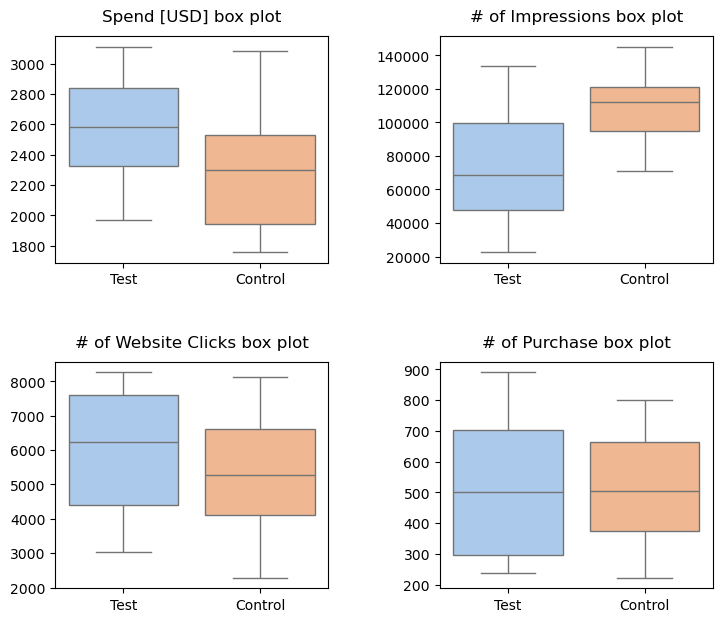

In [18]:
num_vars = list(df.select_dtypes(include=np.number).columns)
n = 1
plt.figure(figsize= (8, 7))

for var in num_vars:
    plt.subplot(2, 2, n)

    g = sns.boxplot(data=df, y=var, x= 'Campaign Name', palette = 'pastel') 
    g.set_xlabel(None)
    g.set_ylabel(None)
    g.set_title(f'{var} box plot', y =1.03)
    plt.xticks(ticks=range(2), labels=['Test', 'Control'])

    n = n + 1
    plt.tight_layout(pad = 3.5)

### Metrics of Interest

#### Click-Through Rate (CTR) - Helps measure the effectiveness of ads in attracting clicks.
#### CTR = (Number of Website Clicks / Number of Impressions)

#### Conversion Rate (CR) - Shows what percentage of visitors who clicked on the ad actually made a purchase.
#### CR = (Number of Purchases / Number of Website Clicks)

#### Cost Per Acquisition (CPA) - Refers to the average cost a company pays to acquire a new customer or a desired conversion, in this case it will be a purchase, through its marketing or advertising strategy.
#### CPA = (Spend [USD] / Number of Purchases)

#### Cost Per Click (CPC) - It allows you to evaluate the efficiency of advertising expenses to generate clicks.
#### CPC = (Spend [USD] / Number of Website Clicks)

In [19]:
df['CTR'] = df['# of Website Clicks'] / df['# of Impressions']
df['CR'] = df['# of Purchase'] / df['# of Website Clicks']
df['CPC'] = df['Spend [USD]'] / df['# of Website Clicks']
df['CPA'] = df['Spend [USD]'] / df['# of Purchase']

df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,# of Website Clicks,# of Purchase,CTR,CR,CPC,CPA
0,Test Campaign,2019-08-01,3008.0,39550.0,3038.0,255.0,0.076814,0.083937,0.990125,11.796078
1,Test Campaign,2019-08-02,2542.0,100719.0,4657.0,677.0,0.046238,0.145373,0.545845,3.754801
2,Test Campaign,2019-08-03,2365.0,70263.0,7885.0,578.0,0.112221,0.073304,0.299937,4.091696
3,Test Campaign,2019-08-04,2710.0,78451.0,4216.0,340.0,0.053741,0.080645,0.642789,7.970588
4,Test Campaign,2019-08-05,2297.0,114295.0,5863.0,768.0,0.051297,0.130991,0.391779,2.990885


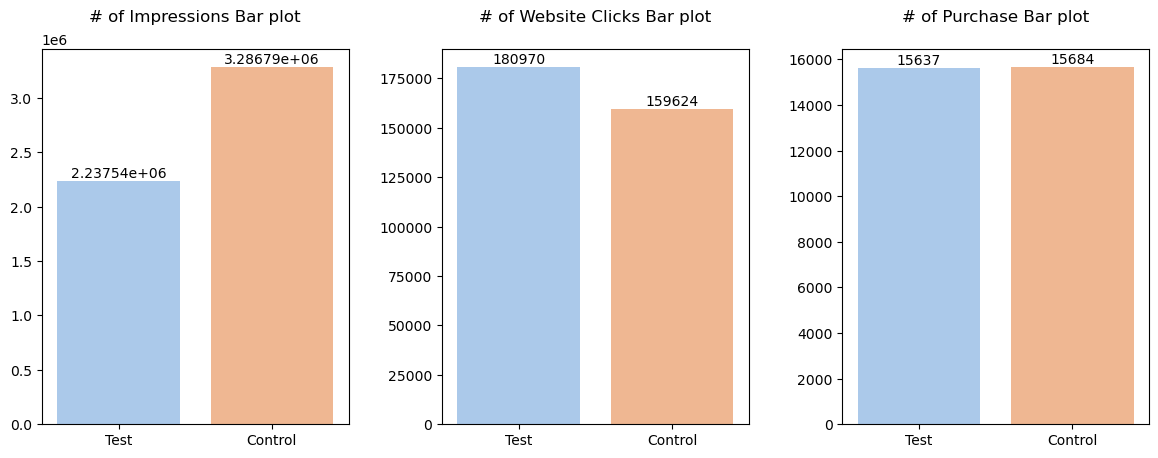

In [20]:
num_vars = ['# of Impressions', '# of Website Clicks', '# of Purchase']
n = 1

plt.figure(figsize=(12, 5))

sns_version = sns.__version__

for var in num_vars:
    plt.subplot(1, 3, n)
    if sns_version >= "0.12":
        g = sns.barplot(data=df, y=var, x='Campaign Name', palette='pastel', estimator=np.sum, errorbar=None)
    else:
        g = sns.barplot(data=df, y=var, x='Campaign Name', palette='pastel', estimator=np.sum, ci=None)
    
    g.set_xlabel(None)
    g.set_ylabel(None)
    g.set_title(f'{var} Bar plot', y=1.05)
    plt.xticks(ticks=range(2), labels=['Test', 'Control'])
    
    # Add bar labels
    for container in g.containers:
        g.bar_label(container)

    n += 1

plt.tight_layout(pad=2.2)
plt.show()


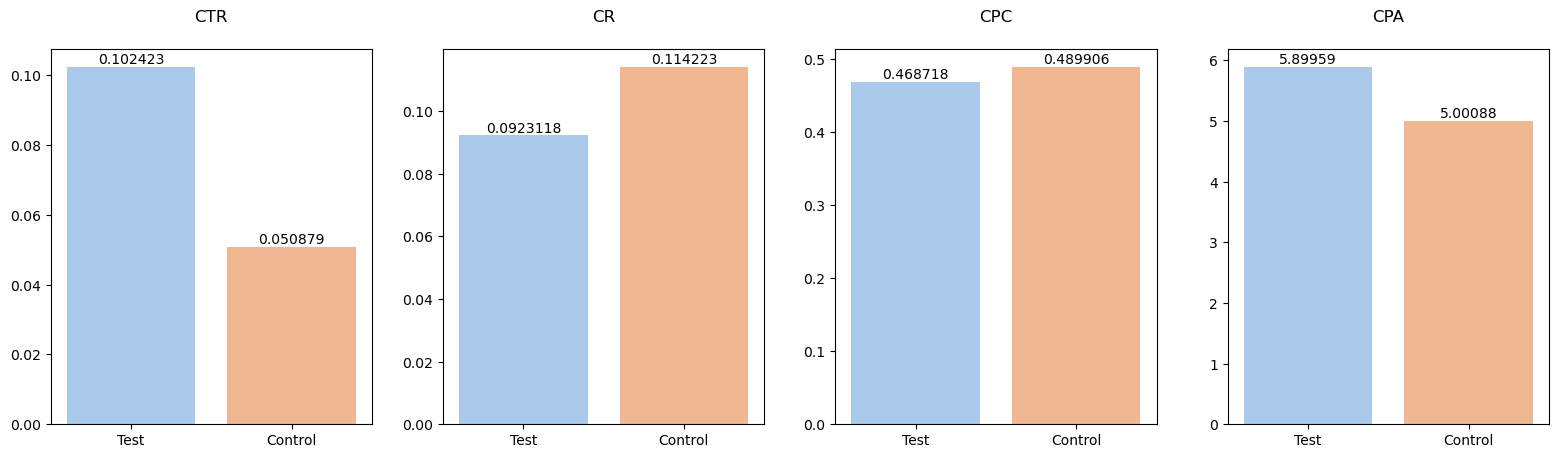

In [21]:
metrics = ['CTR', 'CR', 'CPC', 'CPA']
n = 1

plt.figure(figsize=(16, 5))

sns_version = sns.__version__

for m in metrics:
    plt.subplot(1, 4, n)
    if sns_version >= "0.12":
        g = sns.barplot(data=df, y=m, x='Campaign Name', palette='pastel', estimator=np.mean, errorbar=None)
    else:
        g = sns.barplot(data=df, y=m, x='Campaign Name', palette='pastel', estimator=np.mean, ci=None)
    g.set_xlabel(None)
    g.set_ylabel(None)
    g.set_title(f'{m}', y=1.05)
    plt.xticks(ticks=range(2), labels=['Test', 'Control'])
    

    for container in g.containers:
        g.bar_label(container)
        
    n += 1

plt.tight_layout(pad=2.2)
plt.show()

### Hypothesis Testing

#### Null Hypothesis (H0): There is no difference in performance between Average Bidding and Maximum Bidding.
#### Alternative Hypothesis (H1): There is a significant difference in performance between Average Bidding and Maximum Bidding.

#### Normality test - To test whether the distribution of the data of both groups is normal

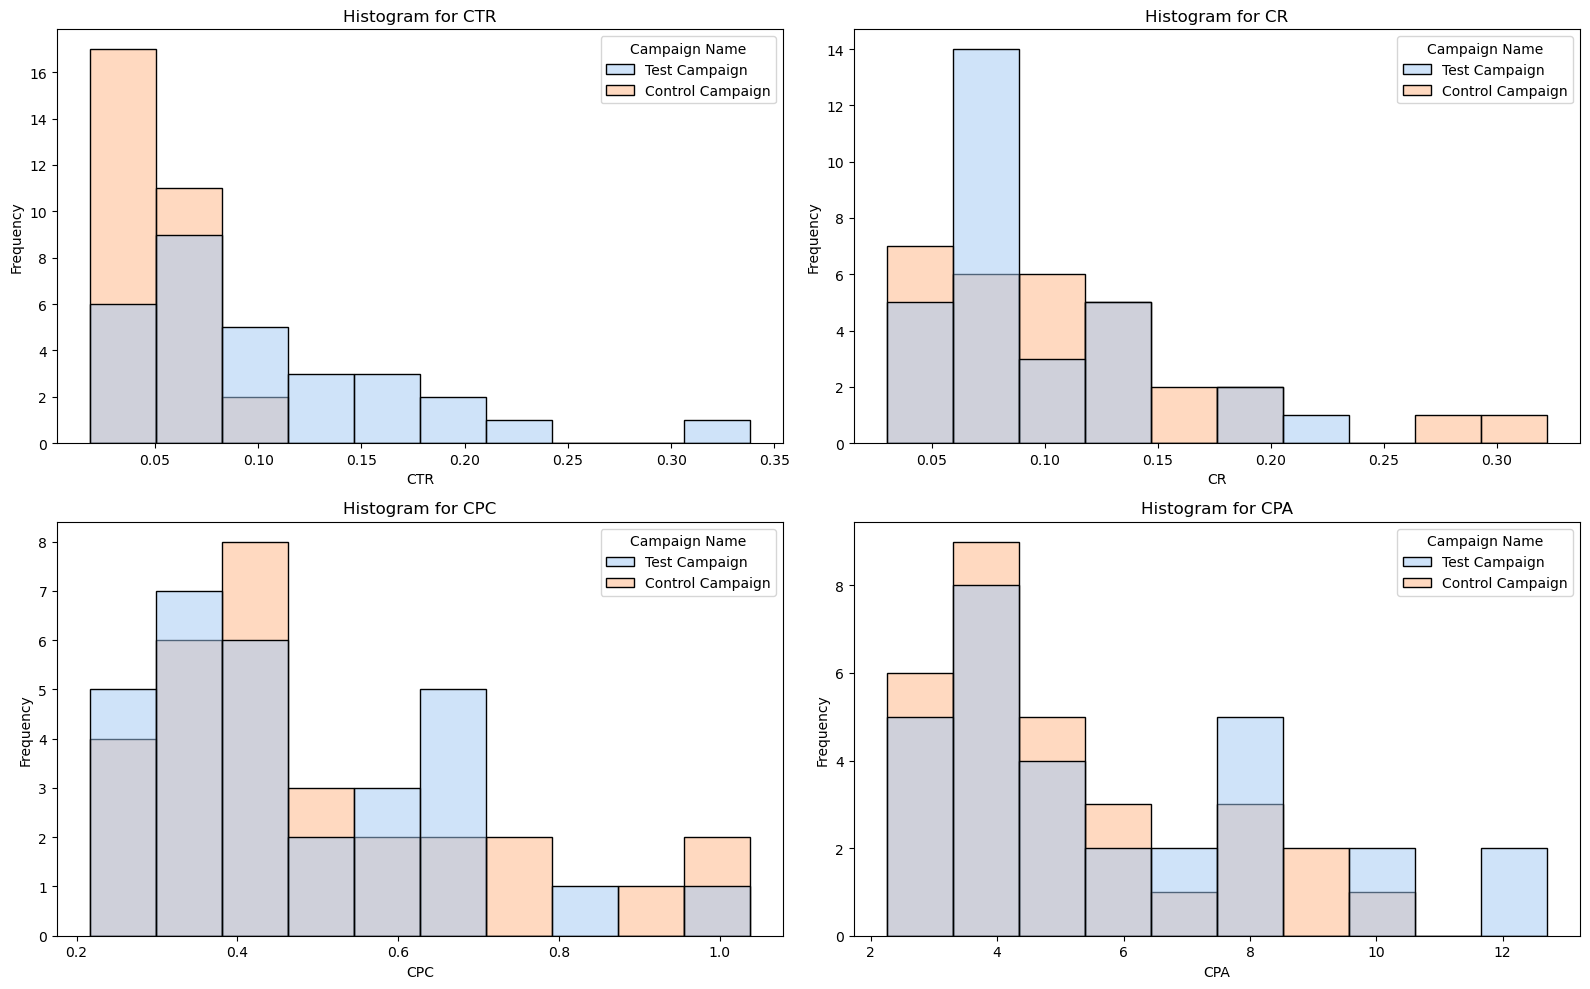

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['CTR', 'CR', 'CPC', 'CPA']
plt.figure(figsize=(16, 10))

for i, m in enumerate(metrics, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=m, hue='Campaign Name', palette='pastel', kde=False, bins=10)
    plt.title(f"Histogram for {m}")
    plt.xlabel(m)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Shapiro-Wiilk Test to check if data deviates from the normal distribution

In [27]:
# Null Hypothesis (H0): Sample is from the normal distribution.
# Alternative Hypothesis (H1): Sample is not from the normal distributions.

In [28]:
metrics = ['CTR', 'CR', 'CPC', 'CPA']
for m in metrics:
    result = shapiro(df[m])
    statistic = result[0]
    p_value = result[1]
    print(f'{m} Shapiro-Wilk Test:\n')
    print(f'\t- Statistic: {statistic}')
    print(f'\t- P-value: {p_value}\n\n')

CTR Shapiro-Wilk Test:

	- Statistic: 0.7670426964759827
	- P-value: 2.2244616815214613e-08


CR Shapiro-Wilk Test:

	- Statistic: 0.8906092047691345
	- P-value: 6.085419954615645e-05


CPC Shapiro-Wilk Test:

	- Statistic: 0.891433596611023
	- P-value: 6.502798350993544e-05


CPA Shapiro-Wilk Test:

	- Statistic: 0.8985587954521179
	- P-value: 0.0001166009169537574




##### we can reject the null hypothesis as p_values is less than the significant level of 0.05. The groups are not normally distributed

#### Mann Whitney U Test

In [29]:
def mann_whitney_u(metric, alpha):
    df_wide = df.pivot(columns = 'Campaign Name', values = metric)
    test = pingouin.mwu(
                 x = df_wide['Control Campaign'],
                 y = df_wide['Test Campaign'],
                 alternative = 'two-sided'
                )

    u_value = test.loc['MWU','U-val']
    p_value = test.loc['MWU', 'p-val'].round(5)

    print('\nMann Whitney U test for {}:\n'.format(metric))
    print(f'\t- p value is {p_value}\n')
    print(f'\t- U value is {u_value}\n')

    if p_value < alpha:
        print('\nWe reject the null hypothesis, there is sufficient evidence to affirm that there is a statistically significant difference between Control and Test {}.'.format(metric))
        
    else:
        print('\nWe fail to reject the null hypothesis, there is sufficient evidence to affirm that there is no statistically significant difference between Control and Test {}.'.format(metric))


#### CTR - Click-Through Rate
#### Null Hypothesis (H0): There is no difference in CTR between Average Bidding and Maximum Bidding.
#### Alternative Hypothesis (H1): There is a significant difference in CTR between Average Bidding and Maximum Bidding.
#### Significance level is 0.05.

In [31]:
mann_whitney_u(metric = 'CTR', alpha = 0.05)


Mann Whitney U test for CTR:

	- p value is 0.00021

	- U value is 199.0


We reject the null hypothesis, there is sufficient evidence to affirm that there is a statistically significant difference between Control and Test CTR.


#### CR - Conversion Rate
#### Null Hypothesis (H0): There is no difference in CR between Average Bidding and Maximum Bidding.
#### Alternative Hypothesis (H1): There is a significant difference in CR between Average Bidding and Maximum Bidding.
#### Significance level is 0.05

<!-- #### CR - Conversion Rate¶
Null Hypothesis (H0): There is no difference in CR between Average Bidding and Maximum Bidding.
Alternative Hypothesis (H1): There is a significant difference in CR between Average Bidding and Maximum Bidding.
Significance level is 0.05. -->

In [32]:
mann_whitney_u(metric = 'CR', alpha = 0.05)


Mann Whitney U test for CR:

	- p value is 0.28378

	- U value is 523.0


We fail to reject the null hypothesis, there is sufficient evidence to affirm that there is no statistically significant difference between Control and Test CR.


#### CPC - Cost Per Click¶
#### Null Hypothesis (H0): There is no difference in CPC between Average Bidding and Maximum Bidding.
#### Alternative Hypothesis (H1): There is a significant difference in CPC between Average Bidding and Maximum Bidding.
#### Significance level is 0.05.

In [33]:
mann_whitney_u(metric = 'CPC', alpha = 0.05)


Mann Whitney U test for CPC:

	- p value is 0.87663

	- U value is 461.0


We fail to reject the null hypothesis, there is sufficient evidence to affirm that there is no statistically significant difference between Control and Test CPC.


#### CPA - Cost Per Acquisition¶
#### Null Hypothesis (H0): There is no difference in CPA between Average Bidding and Maximum Bidding.
#### Alternative Hypothesis (H1): There is a significant difference in CPA between Average Bidding and Maximum Bidding.
#### Significance level is 0.05.

In [34]:
mann_whitney_u(metric = 'CPA', alpha = 0.05)


Mann Whitney U test for CPA:

	- p value is 0.22823

	- U value is 368.0


We fail to reject the null hypothesis, there is sufficient evidence to affirm that there is no statistically significant difference between Control and Test CPA.
